In [1]:
#data appendix - co to za dane, ktore zmienne nas interesują

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

sns.set_style("whitegrid")

In [7]:
df = pd.read_csv("../Analysis data/tidy_tb.csv", index_col=0)

## Dataset description

Provided dataset tb contains historic information about new tuberculosis cases, with information about location (country), sex, year and age range the person that has fallen ill was. Below 

In [9]:
df.drop('year',axis=1).describe()

,cases
count,33615.000000
mean,647.021300
std,3377.082536
min,0.000000
25%,6.000000
50%,45.000000
75%,273.500000
max,90498.000000


# Number observations by sex

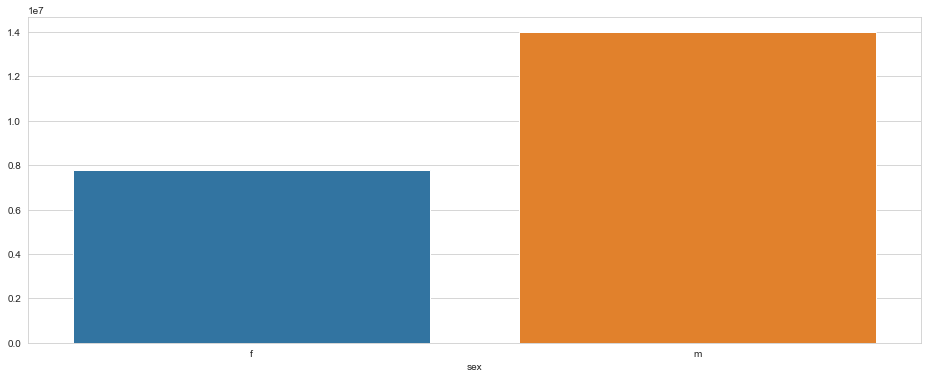

In [24]:
year_counts = df.groupby('sex')['cases'].agg('sum')
plt.figure(figsize=(16, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)

# Number of observations in age groups

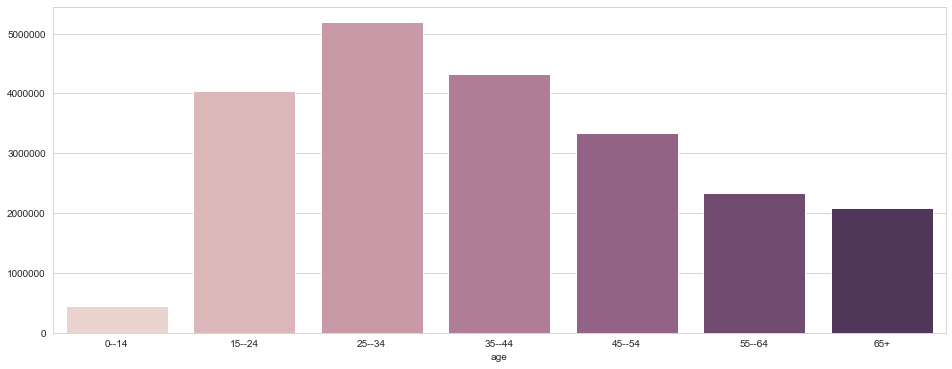

In [19]:
age = df.groupby('age')['cases'].agg('sum')
plt.figure(figsize=(16, 6))
sns.barplot(x=age.index, y=age.values, palette=sns.cubehelix_palette(8))

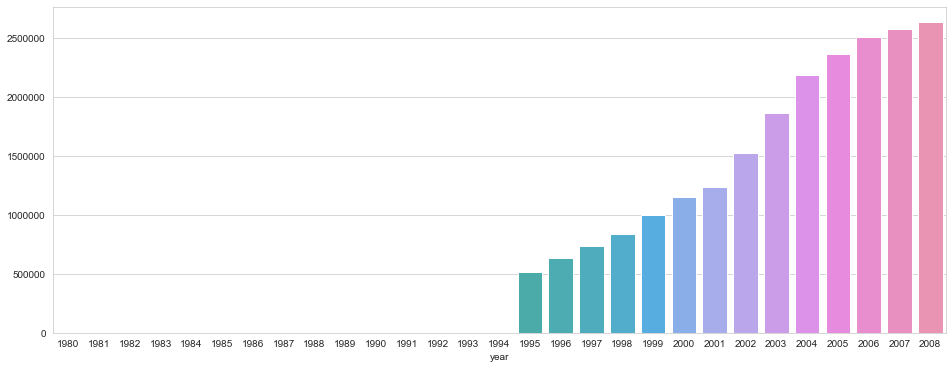

In [12]:
year_counts = df.groupby('year')['cases'].agg('sum')
plt.figure(figsize=(16, 6))
sns.barplot(x=year_counts.index, y=year_counts.values,)

As shown above, until 1995 there was very little cases  of tb illness. Then, amount of people falling sick started increasing rapidly. Newest data - https://www.tballiance.org/why-new-tb-drugs/global-pandemic - says, in 2018 even 10 million people got Tuberculosis

## Total number of Tuberculosis cases until 2008

In [65]:
sum(df['cases'])

21749621

In [89]:
country = df.groupby('country')['cases'].agg('sum')

#plt.figure(figsize=(16, 6))
#sns.barplot(x=country.index, y=country.values)

In [90]:
sorted_country = country.sort_values()

print('Countries with the most cases')
print(sorted_country[-10::])

Countries with the most cases
country
KE     429413
BR     438554
PH     490040
CD     603095
VN     709695
BD     758008
ZA     889364
ID    1125360
IN    3966169
CN    4065174
Name: cases, dtype: int64


In [91]:
print('Countries with the least cases')
print(sorted_country[:10])

Countries with the least cases
country
AI     1
SM     2
NU     2
MC     2
BM     2
MS     4
VG     4
VI     7
KY    12
TC    15
Name: cases, dtype: int64


In [92]:
country.describe()

count    2.120000e+02
mean     1.023162e+05
std      4.108895e+05
min      1.000000e+00
25%      1.093500e+03
50%      1.061850e+04
75%      5.467850e+04
max      4.065174e+06
Name: cases, dtype: float64

Cases in Poland:

In [93]:
country['PL']

47701

Year and country with the most cases:

In [96]:
df[df['cases'] == max(df['cases'])]

,country,year,cases,sex,age
8204,IN,2008,90498,m,35--44
